In [1]:
# importing the libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Avoid to truncating rows and column as well

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Import the dataset

df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3427, 19)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,bestech altura,sector 79,1.85,8605.0,0.0,4,3+,11.0,New Property,1946.0,0,1,0,0,0,1,49,inf
1,flat,rof ananda,sector 95,0.46,6319.0,0.0,2,2,11.0,New Property,809.0,1,0,0,0,0,1,82,inf
2,flat,umang monsoon breeze,sector 78,0.95,5491.0,0.0,3,2,9.0,Relatively New,1730.0,0,0,0,0,0,2,65,inf
3,flat,tata primanti,sector 72,4.00,13769.0,1.0,5,2,7.0,Moderately Old,2629.0,0,1,0,0,0,1,38,2905.00
4,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4,3+,2.0,Relatively New,5200.0,0,1,1,1,0,2,114,1058.75


In [6]:
# Remove the attribute which i dont want to get in input

train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,sector 79,1.85,0.0,4,3+,11.0,New Property,1946.0,0,1,0,0,0,1,49,inf
1,flat,sector 95,0.46,0.0,2,2,11.0,New Property,809.0,1,0,0,0,0,1,82,inf
2,flat,sector 78,0.95,0.0,3,2,9.0,Relatively New,1730.0,0,0,0,0,0,2,65,inf
3,flat,sector 72,4.00,1.0,5,2,7.0,Moderately Old,2629.0,0,1,0,0,0,1,38,2905.00
4,house,sector 66,9.00,4.0,4,3+,2.0,Relatively New,5200.0,0,1,1,1,0,2,114,1058.75


<Axes: >

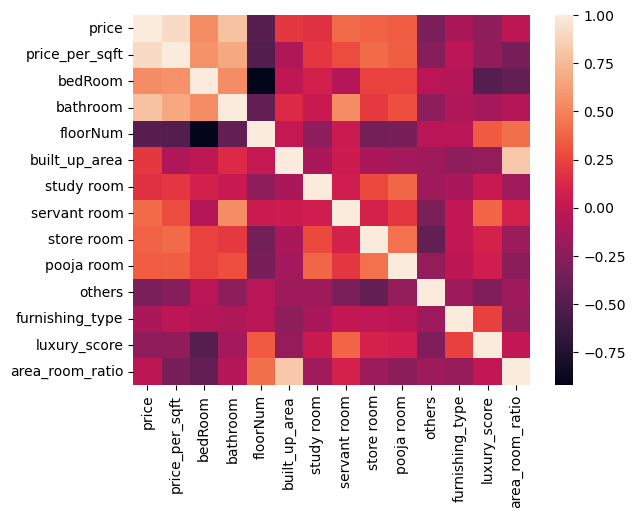

In [8]:
# draw a heatmap for checking the linear dependence

numeric_df = df.select_dtypes(include=['number'])
train_df = numeric_df.corr()

sns.heatmap(train_df.corr())

In [9]:
train_df.corr()['price'].sort_values(ascending=False)

price              1.000000
price_per_sqft     0.914565
bathroom           0.794610
bedRoom            0.543042
servant room       0.402119
store room         0.363867
pooja room         0.344553
built_up_area      0.204695
study room         0.173182
area_room_ratio   -0.023125
furnishing_type   -0.117006
luxury_score      -0.225311
others            -0.325330
floorNum          -0.471882
Name: price, dtype: float64

In [10]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession